In [1]:
#Import library scikit learn untuk decision tree, dataset & matplotlib
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
col_names = ['OUTLOOK', 'TEMPERATURE', 'HUMIDITY', 'WINDY', 'PLAY']
datasets = pd.read_csv("Kuis.csv")

In [3]:
datasets.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY
0,Sunny,Hot,High,No,Don’t Play
1,Sunny,Hot,High,Yes,Don’t Play
2,Cloudy,Hot,High,No,Play
3,Rainy,Mild,High,No,Play
4,Rainy,Cool,Normal,No,Play


In [4]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OUTLOOK      14 non-null     object
 1   TEMPERATURE  14 non-null     object
 2   HUMIDITY     14 non-null     object
 3   WINDY        14 non-null     object
 4   PLAY         14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [5]:
# Merubah kelas/kolom dari String ke Unique-Integer
datasets = datasets.apply(lambda x: pd.factorize(x)[0])

In [6]:
datasets

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1
5,2,2,1,1,1
6,1,2,1,1,1
7,0,1,0,0,0
8,0,2,1,0,1
9,2,1,1,0,1


In [7]:
#membagi data menjadi features dan target
feature_cols = ['OUTLOOK','TEMPERATURE','HUMIDITY','WINDY']
X = datasets[feature_cols] #features
y = datasets.PLAY #Target Variable

In [8]:
# # Membuat object model decision tree
decisiontree = DecisionTreeClassifier(random_state=0, max_depth=None,
                                      min_samples_split=2, min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0)

In [9]:
model = decisiontree.fit(X,y)

In [10]:
# #Mengambil sampel observasi dan membuat prediksi
# #fungsi predict() => memeriksa kelas yg dimilikinya
# #fungsi predict_proba() => memeriksa probabilitas kelas dari prediksi tersebut
observation = [[4, 3, 2, 1]]
model.predict(observation)
model.predict_proba(observation)

array([[0., 1.]])

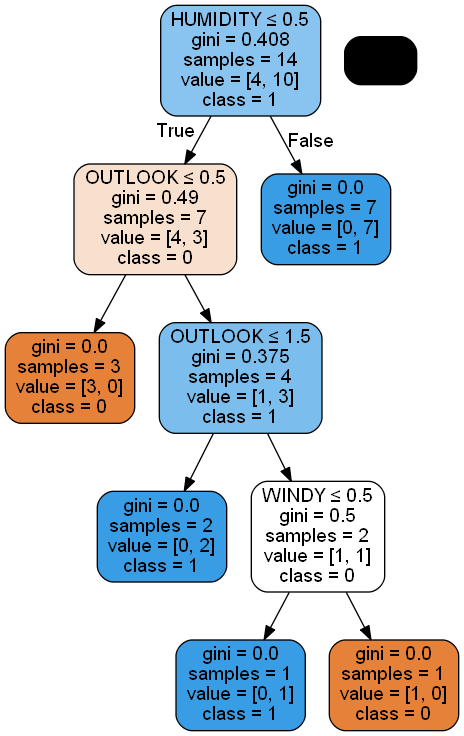

In [11]:
#membuat grafik visualisasi decision tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(decisiontree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())